# importing necessary libraries

In [145]:
from bs4 import BeautifulSoup # parsing the HTML contents
import requests # requests for approval for the data to be web scrapped, and also to get the html contents
import pandas as pd 
import lxml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Webscrapping

In [146]:
url = "https://www.worlddata.info/africa/nigeria/inflation-rates.php"
r = requests.get(url)
r.status_code
soup = BeautifulSoup(r.content)
soup

<!DOCTYPE HTML>
<html lang="en"><head><meta charset="utf-8"/><title>Inflation rates in Nigeria</title><link href="https://js.worlddata.info" rel="preconnect"/><link href="https://js.worlddata.info" rel="dns-prefetch"/><link href="https://cdn.worlddata.info" rel="preconnect"/><link href="https://cdn.worlddata.info" rel="dns-prefetch"/><link href="https://www.laenderdaten.info/Afrika/Nigeria/inflationsraten.php" hreflang="de" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" hreflang="en" rel="alternate"/><link href="https://www.datosmundial.com/africa/nigeria/inflacion.php" hreflang="es" rel="alternate"/><link href="https://www.dadosmundiais.com/africa/nigeria/inflacao.php" hreflang="pt-BR" rel="alternate"/><link href="https://www.donneesmondiales.com/afrique/nigeria/inflation.php" hreflang="fr" rel="alternate"/><link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" id="canonical" rel="canonical"/><meta content="Development o

In [147]:
len(soup.find_all('table'))#for length of table

1

In [148]:
soup.find_all('th')#to get table header

[<th>Year</th>,
 <th>Nigeria</th>,
 <th>Ø EU</th>,
 <th>Ø USA</th>,
 <th>Ø World</th>]

In [165]:
#to make the indentation proper
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Inflation rates in Nigeria
  </title>
  <link href="https://js.worlddata.info" rel="preconnect"/>
  <link href="https://js.worlddata.info" rel="dns-prefetch"/>
  <link href="https://cdn.worlddata.info" rel="preconnect"/>
  <link href="https://cdn.worlddata.info" rel="dns-prefetch"/>
  <link href="https://www.laenderdaten.info/Afrika/Nigeria/inflationsraten.php" hreflang="de" rel="alternate"/>
  <link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" hreflang="en" rel="alternate"/>
  <link href="https://www.datosmundial.com/africa/nigeria/inflacion.php" hreflang="es" rel="alternate"/>
  <link href="https://www.dadosmundiais.com/africa/nigeria/inflacao.php" hreflang="pt-BR" rel="alternate"/>
  <link href="https://www.donneesmondiales.com/afrique/nigeria/inflation.php" hreflang="fr" rel="alternate"/>
  <link href="https://www.worlddata.info/africa/nigeria/inflation-rates.php" id="canonical" 

In [166]:
#To take a look at the title of the web page
print(soup.title)

<title>Inflation rates in Nigeria</title>


In [167]:
#Only the string not the tags
print(soup.title.string)

Inflation rates in Nigeria


In [181]:
#lets save them in a list 
list_row = []
for header in soup.find_all("th"):
    list_row.append(header.text)
    
df = pd.DataFrame(columns= list_row)
row_team = []
tr_ = soup.find_all("tr")
list_of_rows = []
for table_row in range(1,len(tr_)):
    list_for_each_row = [] 
    tr_mini = tr_[table_row]
    for row in tr_mini:
        list_for_each_row.append(row.text)
    list_of_rows.append(list_for_each_row)

for i in list_of_rows:
    df.loc[len(df)]= i
   
print(df)


    Year  Nigeria    Ø EU   Ø USA Ø World
0   2021  16.95 %  2.55 %  4.70 %  3.50 %
1   2020  13.25 %  0.50 %  1.23 %  1.92 %
2   2019  11.40 %  1.63 %  1.81 %  2.19 %
3   2018  12.09 %  1.74 %  2.44 %  2.44 %
4   2017  16.52 %  1.43 %  2.13 %  2.19 %
..   ...      ...     ...     ...     ...
57  1964   0.86 %  3.42 %  1.28 %     n/a
58  1963  -2.69 %  2.92 %  1.24 %     n/a
59  1962   5.27 %  3.55 %  1.20 %     n/a
60  1961   6.28 %  2.08 %  1.07 %     n/a
61  1960   5.44 %  1.74 %  1.46 %     n/a

[62 rows x 5 columns]


In [199]:
df.head(10)

,Year,Nigeria,Europe,USA,World
0,2021,16.95 %,2.55 %,4.70 %,3.50 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %
5,2016,15.68 %,0.18 %,1.26 %,1.55 %
6,2015,9.01 %,-0.06 %,0.12 %,1.43 %
7,2014,8.06 %,0.20 %,1.62 %,2.35 %
8,2013,8.48 %,1.22 %,1.46 %,2.62 %
9,2012,12.22 %,2.66 %,2.07 %,3.73 %


# DATA CLEANING PROCESS

In [200]:
# OUR CLEANING/WRANGLING PROCESS WILL INCLUDE CHECKING; 
#1. If columns properly labelled
# 2. If we have missing values?
#3. If our columns are in the right data type?
# 4. If we have duplicate in the data frame?
# 5. If the Data frame well structured?

In [201]:
#checking for shape of dataframe
df.shape

(62, 5)

In [202]:
#checking columns
df.columns #i would like to remove the tita sign from the 3last columns.

Index(['Year', 'Nigeria', 'Europe', 'USA', 'World'], dtype='object')

In [203]:
#renaming column
rename_column= ["Year", "Nigeria","Europe","USA","World"]


In [213]:
df.columns = rename_column
df#successfully renamed

,Year,Nigeria,Europe,USA,World
0,2021,16.95 %,2.55 %,4.70 %,NaN
1,2020,13.25 %,0.50 %,1.23 %,NaN
2,2019,11.40 %,1.63 %,1.81 %,NaN
3,2018,12.09 %,1.74 %,2.44 %,NaN
4,2017,16.52 %,1.43 %,2.13 %,NaN
...,...,...,...,...,...
57,1964,0.86 %,3.42 %,1.28 %,NaN
58,1963,-2.69 %,2.92 %,1.24 %,NaN
59,1962,5.27 %,3.55 %,1.20 %,NaN
60,1961,6.28 %,2.08 %,1.07 %,NaN


treating empty/ missing values

In [214]:
missing_values = []

for World in df.columns:
    if (df[World] == "n/a").any():
        
        missing_values.append(World)   
missing_values

[]

In [215]:
for x in missing_values:
    print(f"the percetage of {x} is " , "{:.2f}%".format(((df[x].isin(["n/a"]).sum())/df.shape[0])*100))

In [216]:
#The function above shows that our n/a values is 32.26% which is too much of rows to be dropped, 
#as such we shall find a way to fill in the n/a values using the mode value.


In [217]:
df.mode()

,Year,Nigeria,Europe,USA,World
0,1960,-0.48 %,1.74 %,1.46 %,NaN
1,1961,-2.69 %,2.42 %,1.59 %,NaN
2,1962,-3.73 %,2.67 %,NaN,NaN
3,1963,0.86 %,NaN,NaN,NaN
4,1964,10.00 %,NaN,NaN,NaN
...,...,...,...,...,...
57,2017,8.48 %,NaN,NaN,NaN
58,2018,8.53 %,NaN,NaN,NaN
59,2019,9.01 %,NaN,NaN,NaN
60,2020,9.69 %,NaN,NaN,NaN


the mode of our World column is n/a which is the missing values we are trying to treat as such, 
i would like to adopt the mean which is 3.50 as seen below to fill in the n/a values

In [225]:
df.describe()

,World
count,62.0
mean,3.5
std,0.0
min,3.5
25%,3.5
50%,3.5
75%,3.5
max,3.5


In [226]:

df["World"] = df["World"].fillna(3.50)

In [227]:
df

,Year,Nigeria,Europe,USA,World
0,2021,16.95 %,2.55 %,4.70 %,3.5
1,2020,13.25 %,0.50 %,1.23 %,3.5
2,2019,11.40 %,1.63 %,1.81 %,3.5
3,2018,12.09 %,1.74 %,2.44 %,3.5
4,2017,16.52 %,1.43 %,2.13 %,3.5
...,...,...,...,...,...
57,1964,0.86 %,3.42 %,1.28 %,3.5
58,1963,-2.69 %,2.92 %,1.24 %,3.5
59,1962,5.27 %,3.55 %,1.20 %,3.5
60,1961,6.28 %,2.08 %,1.07 %,3.5


In [228]:
#checking for duplicate rows
df.duplicated().sum() #No duplicates

0

In [229]:
#Checking Data type and converting it to the appropriate type
df.dtypes #datatype needs to be changed to integers

Year        object
Nigeria     object
Europe      object
USA         object
World      float64
dtype: object

In [230]:
df["Nigeria"] = [float(str(i).replace("%", "")) for i in df["Nigeria"]]

In [231]:
df["Europe"] = [float(str(i).replace("%", "")) for i in df["Europe"]]

In [232]:
df["USA"] = [float(str(i).replace("%", "")) for i in df["USA"]]

In [233]:
df

,Year,Nigeria,Europe,USA,World
0,2021,16.95,2.55,4.70,3.5
1,2020,13.25,0.50,1.23,3.5
2,2019,11.40,1.63,1.81,3.5
3,2018,12.09,1.74,2.44,3.5
4,2017,16.52,1.43,2.13,3.5
...,...,...,...,...,...
57,1964,0.86,3.42,1.28,3.5
58,1963,-2.69,2.92,1.24,3.5
59,1962,5.27,3.55,1.20,3.5
60,1961,6.28,2.08,1.07,3.5


# Exploratory Data Analysis (EDA)

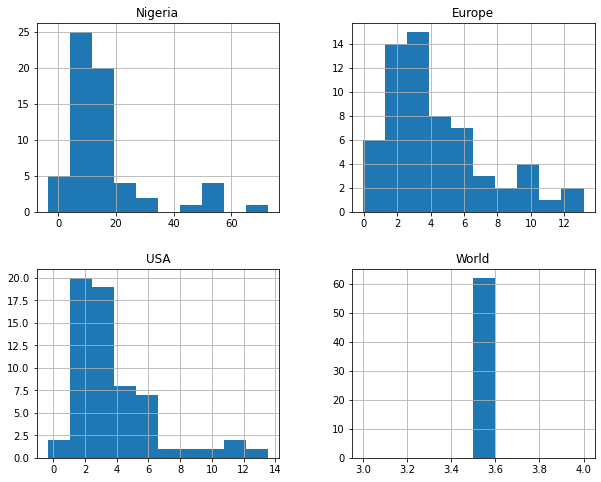

In [235]:
df.hist(figsize=[10,8]);

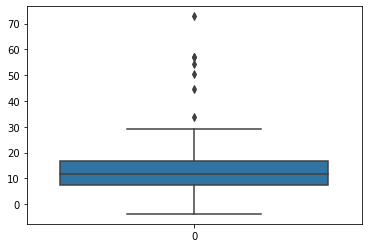

In [238]:
sb.boxplot(data=df["Nigeria"]);#TO IDENTIFY OUTLIERS

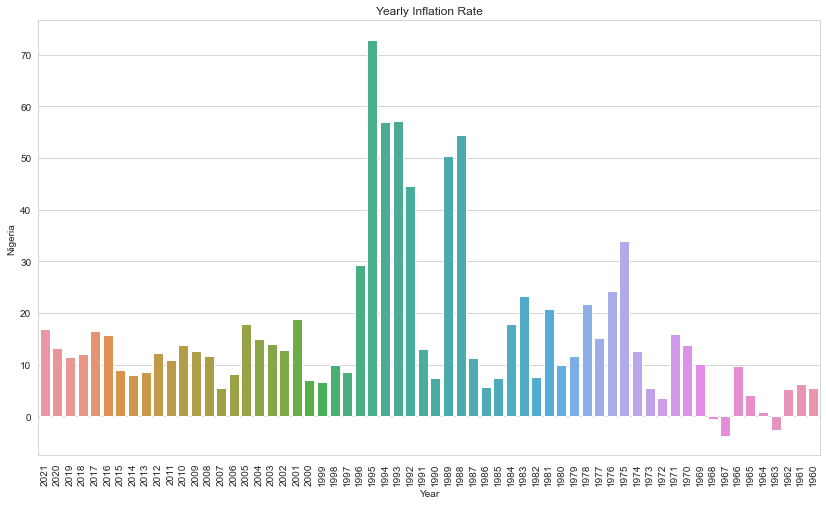

In [243]:
fig, ax = plt.subplots(figsize=(14, 8))
sb.barplot(x=df.Year,y=df.Nigeria)
sb.set_style("whitegrid")
plt.title("Yearly Inflation Rate")
plt.xticks(rotation=90)
plt.show()

the figure above shows that nigeria was at the peak of inflation in 1995 at the rate of over 70%.

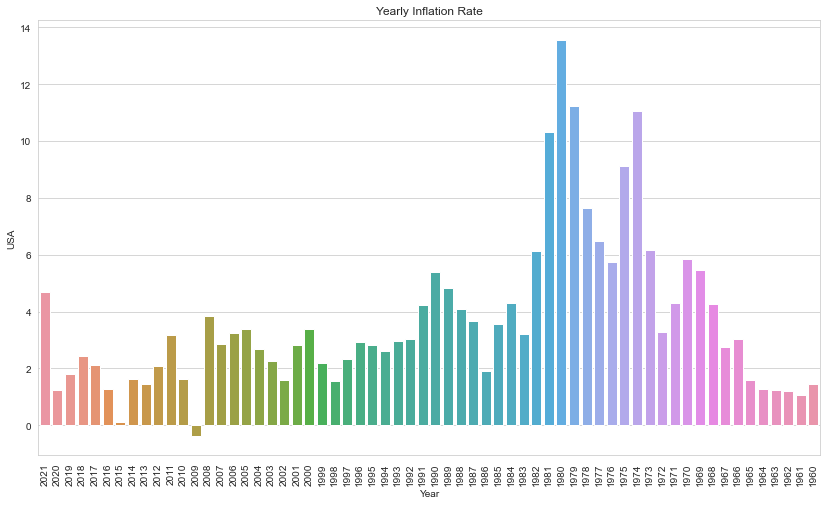

In [246]:
fig, ax = plt.subplots(figsize=(14, 8))
sb.barplot(x=df.Year,y=df.USA)
sb.set_style("whitegrid")
plt.title("Yearly Inflation Rate")
plt.xticks(rotation=90)
plt.show()

the figure above shows that USA was at the peak of inflation in 1980.

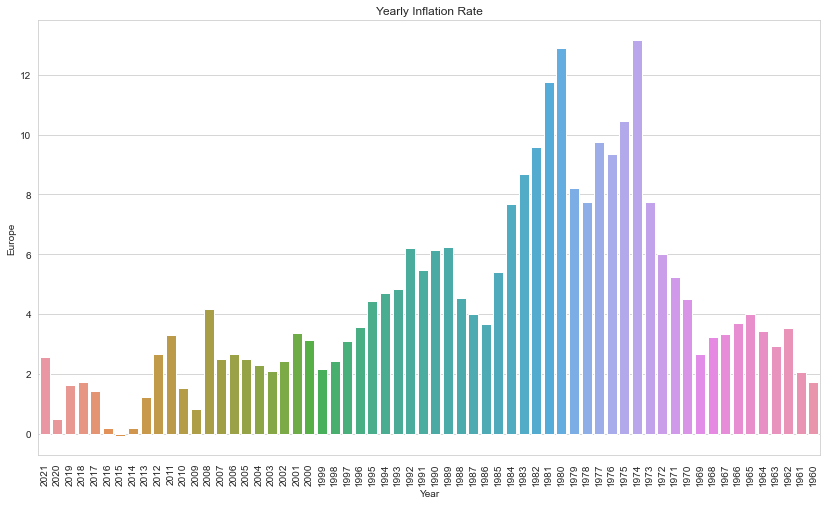

In [253]:
fig, ax = plt.subplots(figsize=(14, 8))
sb.barplot(x=df.Year,y=df.Europe)
sb.set_style("whitegrid")
plt.title("Yearly Inflation Rate")
plt.xticks(rotation=90)
plt.show()

Europe has the highest inflation rate in 1974.

<function matplotlib.pyplot.show(close=None, block=None)>

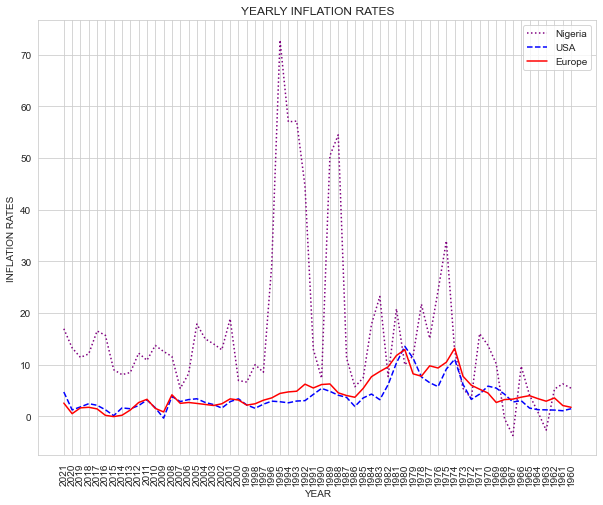

In [252]:
#Comparing all the product sales data for every month using the multiple line plot. 
fig = plt.figure(figsize=(10,8))
x = df['Year']
y1 = df['Nigeria']
plt.plot(x,y1,color='purple', linestyle=':')

x = df['Year']
y2 = df['USA']
plt.plot(x,y2,color='blue', linestyle= '--')

x = df['Year']
y3 = df['Europe']
plt.plot(x,y3,color='red',linestyle= '-')

#LEGEND AT THE TOP LEFT CORNER OF THE AXES SHEET
plt.legend(['Nigeria','USA', 'Europe'])

#LEBELLING MY AXES
plt.title('YEARLY INFLATION RATES')
plt.xlabel('YEAR')
plt.ylabel('INFLATION RATES')
plt.xticks(rotation=90)
plt.show


the multiple line plot above shows how Nigeria's inflation rate is being the highest in a long period of time

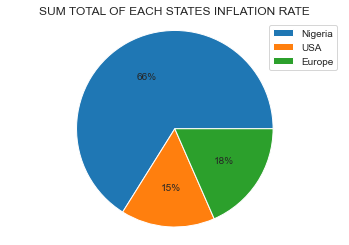

In [266]:
#Calculate and showing the total inflation rates of the three states in a pie chart.
total_rate= [df['Nigeria'].sum(),df['USA'].sum(),df['Europe'].sum()]
items = ['Nigeria','USA','Europe']
plt.pie(total_rate,autopct= '%d%%')
plt.title('SUM TOTAL OF EACH STATES INFLATION RATE')
plt.legend(items,loc='upper right')
plt.axis('equal')
plt.show()

Again, the pie chart comfirms Nigeria as the state with the highest rate of inflation experience.